Given a binary tree where node values are digits from 1 to 9. A path in the binary tree is said to be pseudo-palindromic if at least one permutation of the node values in the path is a palindrome.

Return the number of pseudo-palindromic paths going from the root node to leaf nodes.

 

Example 1:

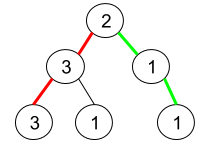

Input: root = [2,3,1,3,1,null,1]
Output: 2 
Explanation: The figure above represents the given binary tree. There are three paths going from the root node to leaf nodes: the red path [2,3,3], the green path [2,1,1], and the path [2,3,1]. Among these paths only red path and green path are pseudo-palindromic paths since the red path [2,3,3] can be rearranged in [3,2,3] (palindrome) and the green path [2,1,1] can be rearranged in [1,2,1] (palindrome).
Example 2:

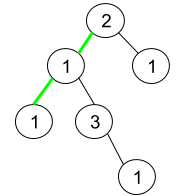

Input: root = [2,1,1,1,3,null,null,null,null,null,1]
Output: 1 
Explanation: The figure above represents the given binary tree. There are three paths going from the root node to leaf nodes: the green path [2,1,1], the path [2,1,3,1], and the path [2,1]. Among these paths only the green path is pseudo-palindromic since [2,1,1] can be rearranged in [1,2,1] (palindrome).
Example 3:

Input: root = [9]
Output: 1
 

Constraints:

The number of nodes in the tree is in the range [1, 105].
1 <= Node.val <= 9

In [16]:
from typing import Optional
from collections import Counter

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def pseudoPalindromicPaths (self, root: Optional[TreeNode]) -> int:
        def analyze_path(path):
            counts = Counter(path)
            max_odds = len(path) % 2
                
            odds = 0
            for count in counts.values():
                odds += count % 2 
                
            if odds > max_odds:
                return False
            return True
        
        self.ans = 0
        def dfs(node, path):
            path.append(node.val)
            if not (node.left or node.right):
                if analyze_path(path):
                    self.ans += 1
            else:
                if node.left:
                    dfs(node.left, path)
                if node.right:
                    dfs(node.right, path)
            path.pop()
            
        dfs(root, [])
        return self.ans


In [29]:
from typing import Optional
from collections import Counter
from functools import cache

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def pseudoPalindromicPaths (self, root: Optional[TreeNode]) -> int:
        @cache
        def analyze_path(counts, max_odds):
            odds = 0
            for count in counts:
                odds += count % 2 
                if odds > max_odds:
                    return False
            return True
        
        self.ans = 0
        def dfs(node, path):
            path.append(node.val)
            if not (node.left or node.right):
                if analyze_path(tuple(Counter(path).values()), len(path) % 2):
                    self.ans += 1
            else:
                if node.left:
                    dfs(node.left, path)
                if node.right:
                    dfs(node.right, path)
            path.pop()
            
        dfs(root, [])
        return self.ans


In [41]:
from typing import Optional
from collections import Counter

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def pseudoPalindromicPaths (self, root: Optional[TreeNode]) -> int:
        def analyze_path(counts, max_odds):
            odds = 0
            for count in counts:
                odds += count % 2 
                if odds > max_odds:
                    return False
            return True
        
        self.ans = 0
        def dfs(node, path_len, counts):
            path_len += 1
            counts[node.val] += 1
            if not (node.left or node.right):
                if analyze_path(counts, path_len % 2):
                    self.ans += 1
            else:
                if node.left:
                    dfs(node.left, path_len, counts)
                if node.right:
                    dfs(node.right, path_len, counts)
            counts[node.val] -= 1
            
        dfs(root, 0, [0 for _ in range(10)])
        return self.ans


In [42]:
s = Solution()

In [43]:
s.pseudoPalindromicPaths(TreeNode(2, TreeNode(3, TreeNode(3), TreeNode(1)), TreeNode(1, None, TreeNode(1))))

2